## 02_EDA

In [1]:
import pandas as pd
from lib import personalised_graphics, transformations

steam_games = pd.read_csv("data/processed/steam_games.csv", index_col=0)
steam_games.dropna(inplace=True)
steam_games

,game_id,date,title,price,developer,url,score,playtime_forever,playtime_2weeks,downloads,popular_genres,common_genres,unpopular_genres
39,327950.0,1989-01-01,Sword of the Samurai,6.99,"MicroProse Software, Inc",http://store.steampowered.com/app/327950/Sword...,1.460000,5084.0,9.0,54.0,"['Adventure', 'Simulation', 'Strategy']","['Retro', 'Classic']",[]
54,32340.0,1990-01-01,LOOM™,5.99,LucasArts,http://store.steampowered.com/app/32340/LOOM/,2.000000,4349.0,0.0,146.0,"['Adventure', 'Singleplayer']","['Point & Click', 'Classic', 'Fantasy', 'Puzzl...",[]
58,9180.0,1990-12-14,Commander Keen,4.99,id Software,http://store.steampowered.com/app/9180/Command...,2.000000,18718.0,41.0,848.0,"['Action', 'Singleplayer']","['Platformer', 'Classic', '2D', 'Retro', ""1990...",[]
74,358260.0,1991-10-23,Crystal Caves,4.99,3D Realms (Apogee Software),http://store.steampowered.com/app/358260/Cryst...,2.000000,733.0,0.0,177.0,['Action'],"['Classic', 'Platformer', ""1990's""]",[]
80,283920.0,1992-01-01,Putt-Putt® Joins the Parade,6.99,Humongous Entertainment,http://store.steampowered.com/app/283920/PuttP...,1.580000,2524.0,3.0,116.0,"['Adventure', 'Casual', 'Singleplayer']","['Point & Click', 'Family Friendly', 'Classic'...",['Cold War']
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27617,335430.0,2017-10-26,Grimoire: Manastorm,0.00,Omniconnection,http://store.steampowered.com/app/335430/Grimo...,2.120000,47572.0,401.0,732.0,"['Action', 'Indie']","['Shooter', 'Free to Play', 'Multiplayer', 'Ma...",[]
27764,355180.0,2017-10-31,Codename CURE,0.00,Hoobalugalar_X,http://store.steampowered.com/app/355180/Coden...,1.094615,305778.0,8385.0,3901.0,"['Action', 'Singleplayer', 'Adventure']","['Free to Play', 'Zombies', 'Multiplayer', 'Su...",['Mod']
27855,250620.0,2017-11-02,Among the Sleep - Enhanced Edition,16.99,Krillbite Studio,http://store.steampowered.com/app/250620/Among...,2.031111,46135.0,138.0,389.0,"['Indie', 'Adventure', 'Singleplayer', 'Action...","['Horror', 'Atmospheric', 'First-Person', 'Wal...",['VR']
29082,285900.0,2017-12-12,Gang Beasts,19.99,Boneloaf,http://store.steampowered.com/app/285900/Gang_...,1.132308,497569.0,14709.0,1476.0,"['Action', 'Indie', 'Casual', 'Adventure', 'Si...","['Funny', 'Multiplayer', 'Fighting', 'Local Mu...",[]


##### date

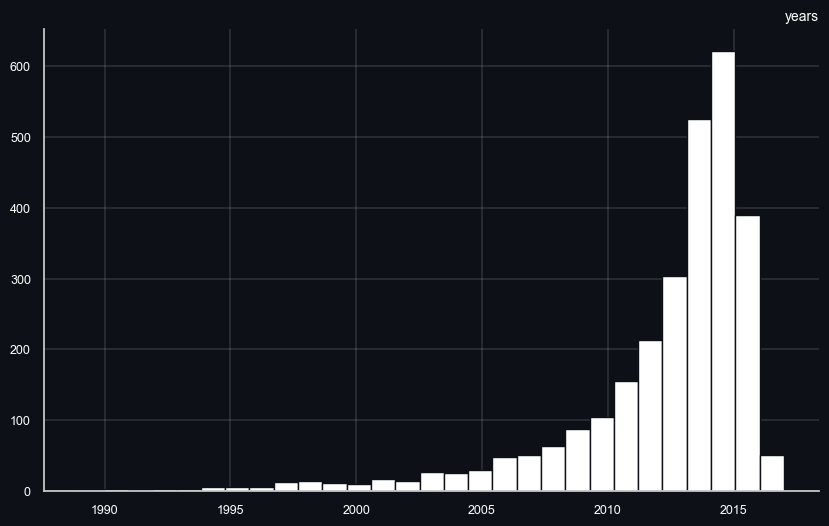

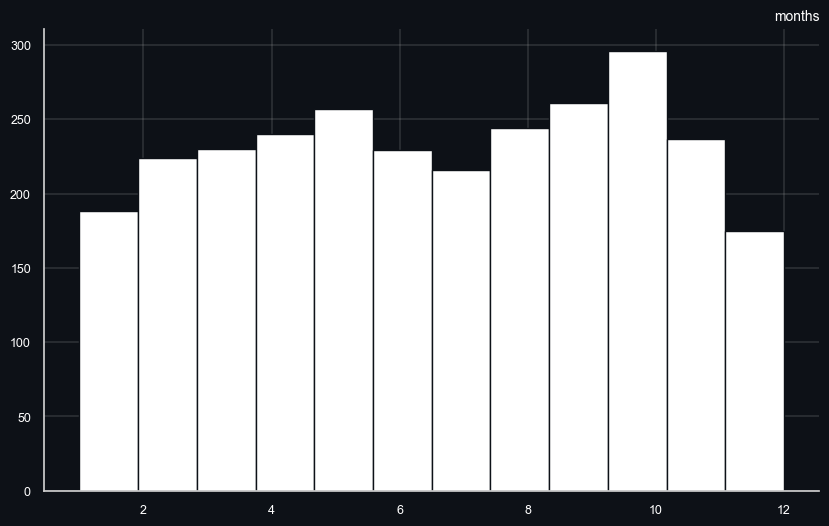

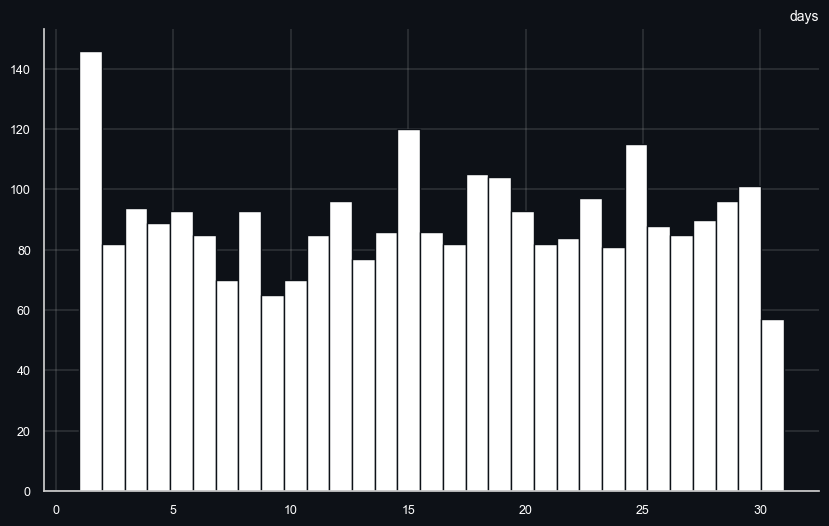

In [2]:
steam_games['date'] = pd.to_datetime(steam_games['date'])
personalised_graphics.histogram(steam_games["date"].dt.year, "years")
personalised_graphics.histogram(steam_games["date"].dt.month, "months")
personalised_graphics.histogram(steam_games["date"].dt.day, "days")

##### title

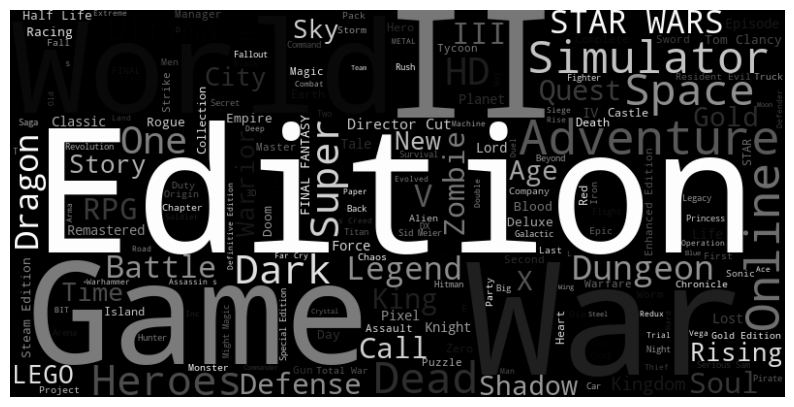

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convierte la lista de títulos en un solo texto separado por espacios
text = " ".join(steam_games["title"])

# Crea un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='gray', contour_color='white').generate(text)

# Muestra la nube de palabras en una figura
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Oculta los ejes
plt.show()

##### price

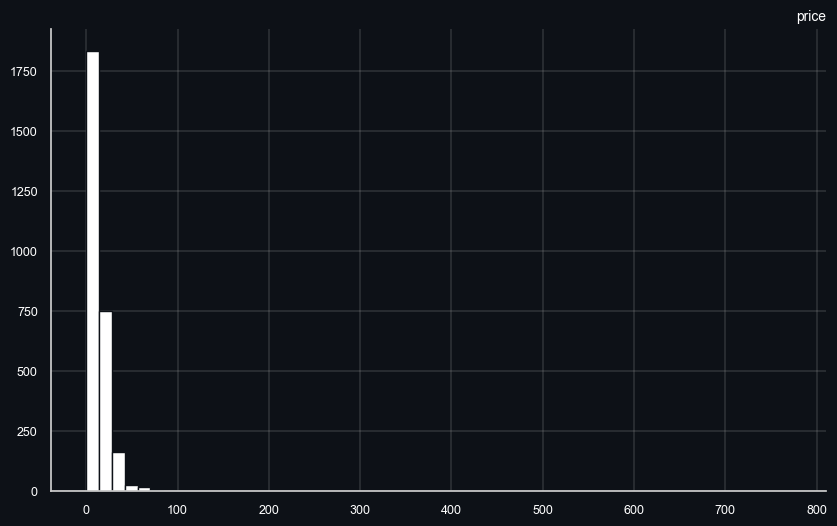

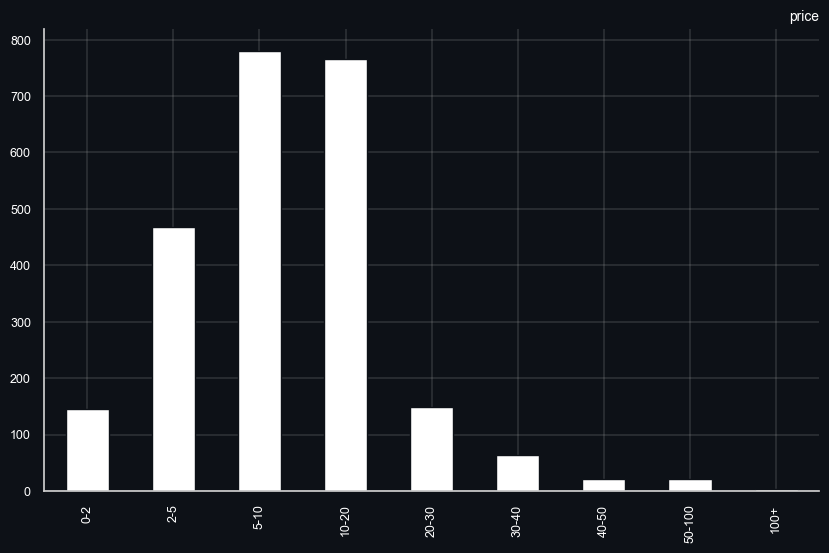

In [4]:
personalised_graphics.histogram(steam_games["price"], "price")

# Discretise price values
bins = [0, 2, 5, 10, 20, 30, 40, 50, 100, float('inf')]
labels = ["0-2", "2-5", "5-10", "10-20", "20-30", "30-40", "40-50", "50-100", "100+"]
steam_games['price_discr'] = pd.cut(steam_games['price'], bins=bins, labels=labels)

personalised_graphics.barplot(steam_games["price_discr"].value_counts().sort_index(), "price")

##### developer

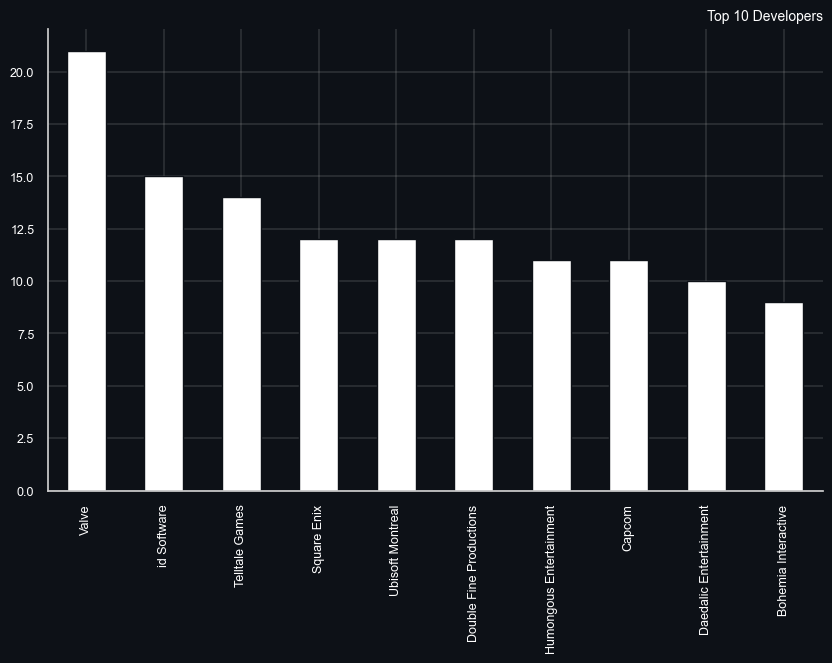

In [5]:
personalised_graphics.barplot(steam_games["developer"].value_counts().head(10), "Top 10 Developers")

##### genres

In [6]:
genres = steam_games[["genres"]]
genres = genres.dropna()
genres['genres'] = genres['genres'].apply(eval)
genres = genres.explode('genres')
personalised_graphics.barplot(genres["genres"].value_counts().head(15), "Top 15 Genres")

KeyError: "None of [Index(['genres'], dtype='object')] are in the [columns]"

In [8]:
import pandas as pd

# Crea una copia del DataFrame original.
steam_games_copy = steam_games.copy()

# Para eliminar outliers en 'playtime_forever':
Q1 = steam_games_copy['playtime_forever'].quantile(0.25)
Q3 = steam_games_copy['playtime_forever'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
steam_games_copy = steam_games_copy[(steam_games_copy['playtime_forever'] >= lower_bound) & (steam_games_copy['playtime_forever'] <= upper_bound)]

# Para eliminar outliers en 'playtime_forever':
Q1 = steam_games_copy['playtime_2weeks'].quantile(0.25)
Q3 = steam_games_copy['playtime_2weeks'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
steam_games_copy = steam_games_copy[(steam_games_copy['playtime_2weeks'] >= lower_bound) & (steam_games_copy['playtime_2weeks'] <= upper_bound)]

# Para eliminar outliers en 'price':
Q1 = steam_games_copy['downloads'].quantile(0.25)
Q3 = steam_games_copy['downloads'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
steam_games_copy = steam_games_copy[(steam_games_copy['downloads'] >= lower_bound) & (steam_games_copy['downloads'] <= upper_bound)]

# Set a maximum price of 200 for games that originally cost more than 200
steam_games_copy['price'] = steam_games_copy['price'].apply(lambda x: 200 if x > 200 else x)

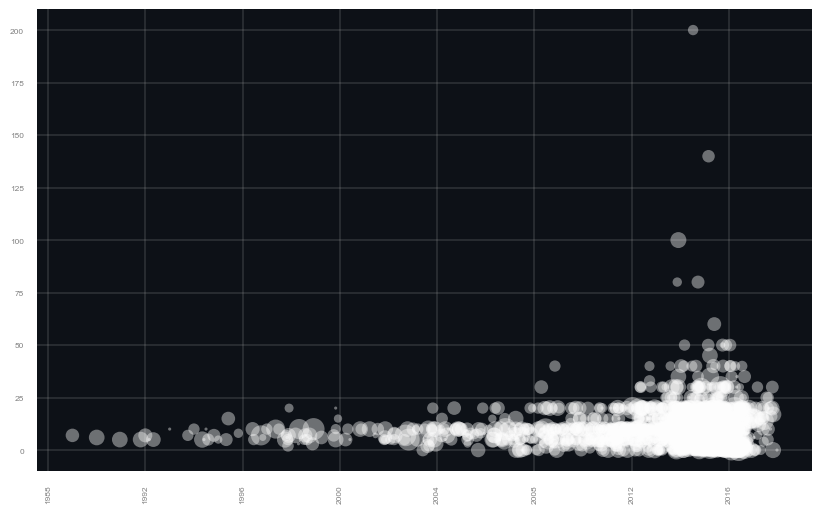

In [9]:
import seaborn as sns

red_color = "#E63946"
back_color = "#0D1117"

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(back_color)
sns.scatterplot(x='date', y='price', data=steam_games_copy, color="white", size="score", legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))
#sns.scatterplot(x='date', y='price', data=edata_white, color=red_color, size='count', legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))

plt.xlabel('')


plt.ylabel('')
#title = plt.title(f"{price}                ", loc='right')
#title.set_color(red_color)

# Quitar el borde de la grilla en los ejes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xticks(rotation=90)
plt.tick_params(axis='x', colors='grey')  
plt.tick_params(axis='y', colors='grey')  
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)

# Cambia el color de la grilla de fondo a gris
ax.grid(color='darkgrey', linewidth=0.25)

# Guardar el gráfico como un archivo JPEG
plt.savefig(f"gallery/scatter_plot.jpg", format='jpg', dpi=300, bbox_inches='tight', facecolor=back_color)

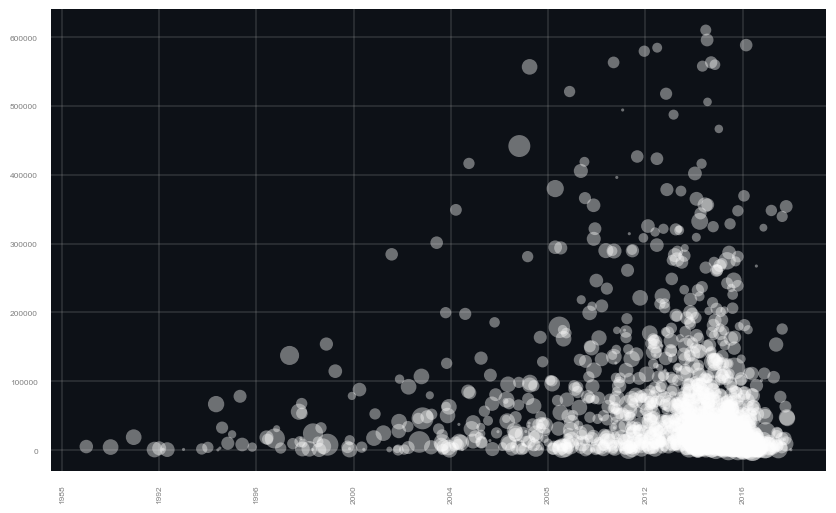

In [10]:
import seaborn as sns

red_color = "#E63946"
back_color = "#0D1117"

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(back_color)
sns.scatterplot(x='date', y='playtime_forever', data=steam_games_copy, color="white", size="score", legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))
#sns.scatterplot(x='date', y='price', data=edata_white, color=red_color, size='count', legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))

plt.xlabel('')


plt.ylabel('')
#title = plt.title(f"{price}                ", loc='right')
#title.set_color(red_color)

# Quitar el borde de la grilla en los ejes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xticks(rotation=90)
plt.tick_params(axis='x', colors='grey')  
plt.tick_params(axis='y', colors='grey')  
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)

# Cambia el color de la grilla de fondo a gris
ax.grid(color='darkgrey', linewidth=0.25)

# Guardar el gráfico como un archivo JPEG
plt.savefig(f"gallery/scatter_plot.jpg", format='jpg', dpi=300, bbox_inches='tight', facecolor=back_color)

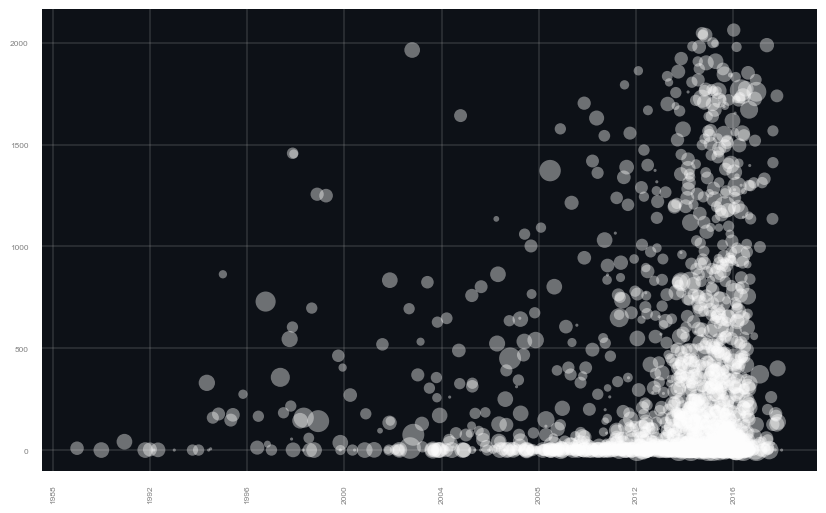

In [11]:
import seaborn as sns

red_color = "#E63946"
back_color = "#0D1117"

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(back_color)
sns.scatterplot(x='date', y='playtime_2weeks', data=steam_games_copy, color="white", size="score", legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))
#sns.scatterplot(x='date', y='price', data=edata_white, color=red_color, size='count', legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))

plt.xlabel('')


plt.ylabel('')
#title = plt.title(f"{price}                ", loc='right')
#title.set_color(red_color)

# Quitar el borde de la grilla en los ejes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xticks(rotation=90)
plt.tick_params(axis='x', colors='grey')  
plt.tick_params(axis='y', colors='grey')  
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)

# Cambia el color de la grilla de fondo a gris
ax.grid(color='darkgrey', linewidth=0.25)

# Guardar el gráfico como un archivo JPEG
plt.savefig(f"gallery/scatter_plot.jpg", format='jpg', dpi=300, bbox_inches='tight', facecolor=back_color)

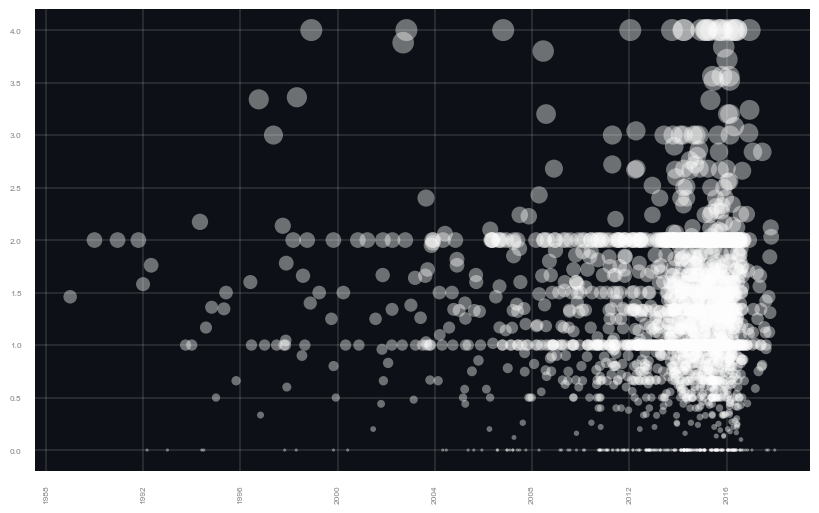

In [12]:
import seaborn as sns

red_color = "#E63946"
back_color = "#0D1117"

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(back_color)
sns.scatterplot(x='date', y='score', data=steam_games_copy, color="white", size="score", legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))
#sns.scatterplot(x='date', y='price', data=edata_white, color=red_color, size='count', legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))

plt.xlabel('')


plt.ylabel('')
#title = plt.title(f"{price}                ", loc='right')
#title.set_color(red_color)

# Quitar el borde de la grilla en los ejes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xticks(rotation=90)
plt.tick_params(axis='x', colors='grey')  
plt.tick_params(axis='y', colors='grey')  
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)

# Cambia el color de la grilla de fondo a gris
ax.grid(color='darkgrey', linewidth=0.25)

# Guardar el gráfico como un archivo JPEG
plt.savefig(f"gallery/scatter_plot.jpg", format='jpg', dpi=300, bbox_inches='tight', facecolor=back_color)

In [ ]:
import seaborn as sns

red_color = "#E63946"
back_color = "#0D1117"

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor(back_color)
sns.scatterplot(x='date', y='score', data=steam_games_copy, color="white", size="score", legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))
#sns.scatterplot(x='date', y='price', data=edata_white, color=red_color, size='count', legend=False, edgecolor='none', alpha=0.4, sizes=(5,250))

plt.xlabel('')


plt.ylabel('')
#title = plt.title(f"{price}                ", loc='right')
#title.set_color(red_color)

# Quitar el borde de la grilla en los ejes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xticks(rotation=90)
plt.tick_params(axis='x', colors='grey')  
plt.tick_params(axis='y', colors='grey')  
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)

# Cambia el color de la grilla de fondo a gris
ax.grid(color='darkgrey', linewidth=0.25)

# Guardar el gráfico como un archivo JPEG
plt.savefig(f"gallery/scatter_plot.jpg", format='jpg', dpi=300, bbox_inches='tight', facecolor=back_color)

In [13]:
steam_games

,game_id,date,title,price,developer,url,score,playtime_forever,playtime_2weeks,downloads,popular_genres,common_genres,unpopular_genres,price_discr
39,327950.0,1989-01-01,Sword of the Samurai,6.99,"MicroProse Software, Inc",http://store.steampowered.com/app/327950/Sword...,1.460000,5084.0,9.0,54.0,"['Adventure', 'Simulation', 'Strategy']","['Retro', 'Classic']",[],5-10
54,32340.0,1990-01-01,LOOM™,5.99,LucasArts,http://store.steampowered.com/app/32340/LOOM/,2.000000,4349.0,0.0,146.0,"['Adventure', 'Singleplayer']","['Point & Click', 'Classic', 'Fantasy', 'Puzzl...",[],5-10
58,9180.0,1990-12-14,Commander Keen,4.99,id Software,http://store.steampowered.com/app/9180/Command...,2.000000,18718.0,41.0,848.0,"['Action', 'Singleplayer']","['Platformer', 'Classic', '2D', 'Retro', ""1990...",[],2-5
74,358260.0,1991-10-23,Crystal Caves,4.99,3D Realms (Apogee Software),http://store.steampowered.com/app/358260/Cryst...,2.000000,733.0,0.0,177.0,['Action'],"['Classic', 'Platformer', ""1990's""]",[],2-5
80,283920.0,1992-01-01,Putt-Putt® Joins the Parade,6.99,Humongous Entertainment,http://store.steampowered.com/app/283920/PuttP...,1.580000,2524.0,3.0,116.0,"['Adventure', 'Casual', 'Singleplayer']","['Point & Click', 'Family Friendly', 'Classic'...",['Cold War'],5-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27617,335430.0,2017-10-26,Grimoire: Manastorm,0.00,Omniconnection,http://store.steampowered.com/app/335430/Grimo...,2.120000,47572.0,401.0,732.0,"['Action', 'Indie']","['Shooter', 'Free to Play', 'Multiplayer', 'Ma...",[],NaN
27764,355180.0,2017-10-31,Codename CURE,0.00,Hoobalugalar_X,http://store.steampowered.com/app/355180/Coden...,1.094615,305778.0,8385.0,3901.0,"['Action', 'Singleplayer', 'Adventure']","['Free to Play', 'Zombies', 'Multiplayer', 'Su...",['Mod'],NaN
27855,250620.0,2017-11-02,Among the Sleep - Enhanced Edition,16.99,Krillbite Studio,http://store.steampowered.com/app/250620/Among...,2.031111,46135.0,138.0,389.0,"['Indie', 'Adventure', 'Singleplayer', 'Action...","['Horror', 'Atmospheric', 'First-Person', 'Wal...",['VR'],10-20
29082,285900.0,2017-12-12,Gang Beasts,19.99,Boneloaf,http://store.steampowered.com/app/285900/Gang_...,1.132308,497569.0,14709.0,1476.0,"['Action', 'Indie', 'Casual', 'Adventure', 'Si...","['Funny', 'Multiplayer', 'Fighting', 'Local Mu...",[],10-20


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
import pandas as pd
import numpy as np

labels = ["0-2", "2-5", "5-10", "10-20", "20-30", "30-40", "40-50", "50-100", "100+"]
steam_games_copy["price_discr"].replace("0-2", 0, inplace=True)
steam_games_copy["price_discr"].replace("2-5", 1, inplace=True)
steam_games_copy["price_discr"].replace("5-10", 1, inplace=True)
steam_games_copy["price_discr"].replace("10-20", 2, inplace=True)
steam_games_copy["price_discr"].replace("20-30", 3, inplace=True)
steam_games_copy["price_discr"].replace("30-40", 3, inplace=True)
steam_games_copy["price_discr"].replace("40-50", 3, inplace=True)
steam_games_copy["price_discr"].replace("50-100", 3, inplace=True)
steam_games_copy["price_discr"].replace("100+", 3, inplace=True)

In [15]:
steam_games_copy

,game_id,date,title,price,developer,url,score,playtime_forever,playtime_2weeks,downloads,popular_genres,common_genres,unpopular_genres,price_discr
39,327950.0,1989-01-01,Sword of the Samurai,6.99,"MicroProse Software, Inc",http://store.steampowered.com/app/327950/Sword...,1.460000,5084.0,9.0,54.0,"['Adventure', 'Simulation', 'Strategy']","['Retro', 'Classic']",[],1
54,32340.0,1990-01-01,LOOM™,5.99,LucasArts,http://store.steampowered.com/app/32340/LOOM/,2.000000,4349.0,0.0,146.0,"['Adventure', 'Singleplayer']","['Point & Click', 'Classic', 'Fantasy', 'Puzzl...",[],1
58,9180.0,1990-12-14,Commander Keen,4.99,id Software,http://store.steampowered.com/app/9180/Command...,2.000000,18718.0,41.0,848.0,"['Action', 'Singleplayer']","['Platformer', 'Classic', '2D', 'Retro', ""1990...",[],1
74,358260.0,1991-10-23,Crystal Caves,4.99,3D Realms (Apogee Software),http://store.steampowered.com/app/358260/Cryst...,2.000000,733.0,0.0,177.0,['Action'],"['Classic', 'Platformer', ""1990's""]",[],1
80,283920.0,1992-01-01,Putt-Putt® Joins the Parade,6.99,Humongous Entertainment,http://store.steampowered.com/app/283920/PuttP...,1.580000,2524.0,3.0,116.0,"['Adventure', 'Casual', 'Singleplayer']","['Point & Click', 'Family Friendly', 'Classic'...",['Cold War'],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27086,433530.0,2017-10-12,Heliborne,19.99,JetCat Games,http://store.steampowered.com/app/433530/Helib...,1.840000,9027.0,127.0,45.0,"['Action', 'Indie', 'Casual', 'Singleplayer', ...","['Flight', 'Multiplayer', 'Tactical', 'Militar...",[],2
27205,25000.0,2017-10-16,Overgrowth,29.99,Wolfire Games,http://store.steampowered.com/app/25000/Overgr...,1.308696,354047.0,1739.0,782.0,"['Action', 'Indie', 'Singleplayer', 'Adventure...","['Parkour', 'Sandbox', 'Fighting', 'Fast-Paced...","['Martial Arts', 'Ninja']",3
27617,335430.0,2017-10-26,Grimoire: Manastorm,0.00,Omniconnection,http://store.steampowered.com/app/335430/Grimo...,2.120000,47572.0,401.0,732.0,"['Action', 'Indie']","['Shooter', 'Free to Play', 'Multiplayer', 'Ma...",[],NaN
27855,250620.0,2017-11-02,Among the Sleep - Enhanced Edition,16.99,Krillbite Studio,http://store.steampowered.com/app/250620/Among...,2.031111,46135.0,138.0,389.0,"['Indie', 'Adventure', 'Singleplayer', 'Action...","['Horror', 'Atmospheric', 'First-Person', 'Wal...",['VR'],2


C:\Users\david\AppData\Local\Temp\ipykernel_2908\4101592947.py:38: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color(back_color)
C:\Users\david\AppData\Local\Temp\ipykernel_2908\4101592947.py:39: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color(back_color)
C:\Users\david\AppData\Local\Temp\ipykernel_2908\4101592947.py:40: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color(back_color)


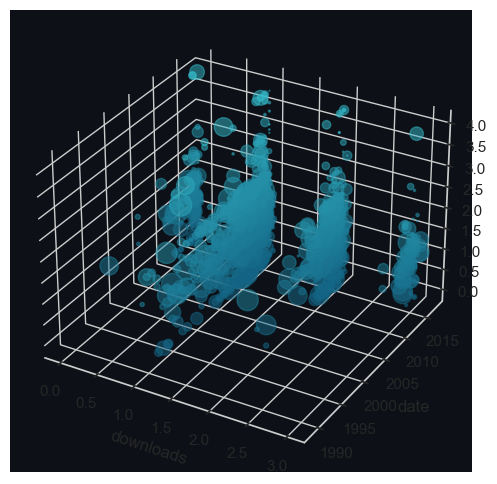

In [68]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable

# Your data
y = steam_games_copy['date'].dt.year
x = steam_games_copy["price_discr"]
z = steam_games_copy["score"]
downloads = steam_games_copy["downloads"]  # Assuming you have a 'downloads' column

red_color = "#E63946"
back_color = "#0D1117"
color1 = "#146585"  # Start color
color2 = "#34b9c9"  # End color"#146585", "#34b9c9"
cmap = LinearSegmentedColormap.from_list('custom_cmap', [color1, color2], N=256)

# Define the maximum size for the data points
max_size = 250  # Adjust this value to your preference

# Normalize the 'downloads' data to map it to the size range [0, max_size]
normalized_sizes = max_size * (downloads / max(downloads))

# Create a custom colormap that transitions between color1 and color2


# Create a 3D subplot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set_facecolor(back_color)

# Create a 3D scatterplot with colors based on 'score' values and sizes based on 'downloads'
scatter = ax.scatter(x, y, z, c=z, cmap=cmap, alpha=0.5, s=normalized_sizes)

# Customize the appearance
ax.set_xlabel('downloads')
ax.set_ylabel('date')
ax.set_zlabel('score')
ax.w_xaxis.set_pane_color(back_color)
ax.w_yaxis.set_pane_color(back_color)
ax.w_zaxis.set_pane_color(back_color)
ax.grid(color='darkgrey', linewidth=0.25)

# Create a colorbar for the gradient
#sm = ScalarMappable(cmap=cmap)
#sm.set_array([])  # You need to set an array, but it can be empty
#cbar = plt.colorbar(sm, ax=ax, pad=0.1, aspect=10, orientation='vertical')
#cbar.set_label('Color Gradient')

# Save the 3D scatterplot as a file
plt.savefig("gallery/scatter_3d_plot.jpg", format='jpg', dpi=300, bbox_inches='tight', facecolor=back_color)

plt.show()

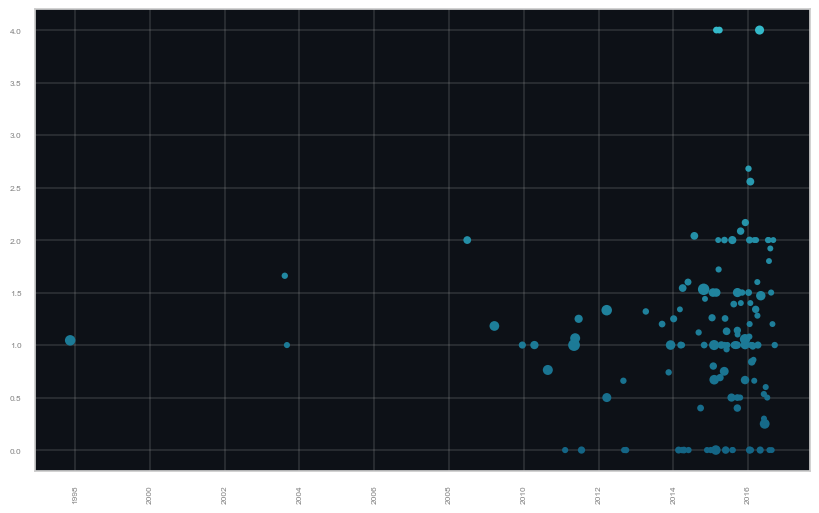

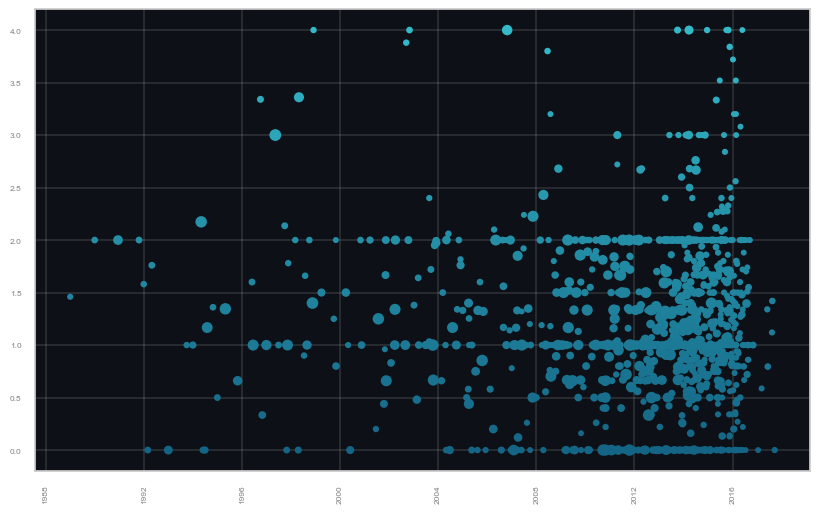

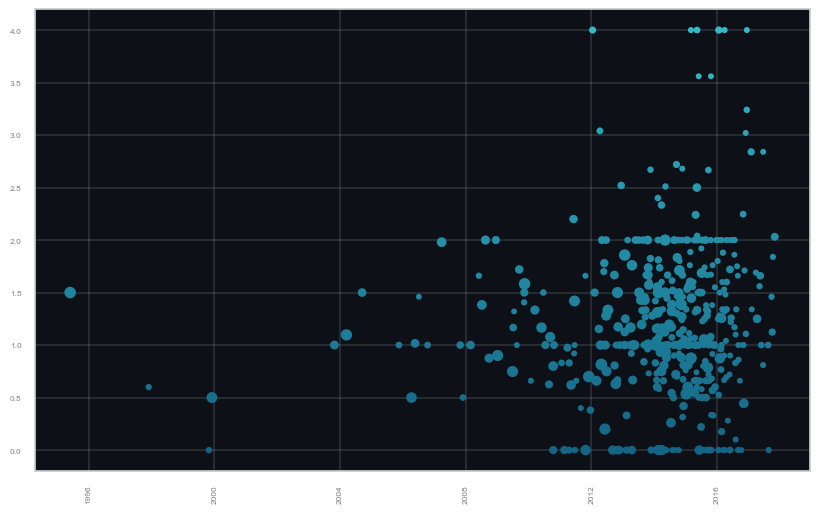

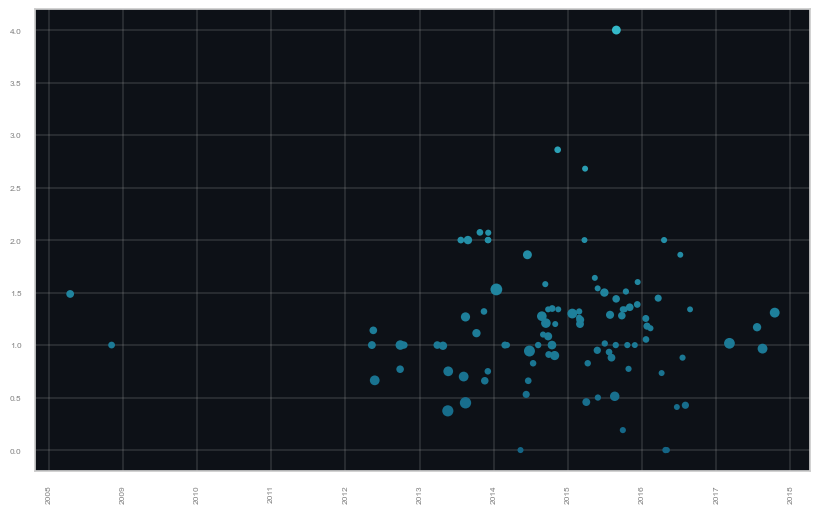

In [84]:
for i in range(4):

    data = steam_games_copy[steam_games_copy["price_discr"] == i]

    back_color = "#0D1117"
    color1 = "#146585"  # Start color
    color2 = "#34b9c9"  # End color
    cmap = LinearSegmentedColormap.from_list('custom_cmap', [color1, color2], N=100)

    

    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    plt.gca().set_facecolor(back_color)
    
    # Specify 'score' as the variable to map to colors using the colormap
    sns.scatterplot(x='date', y='score', data=data, size="downloads", legend=False, edgecolor='none', alpha=1, cmap=cmap, c=data['score'])

    plt.xlabel('')
    plt.ylabel('')

    # Other styling and formatting as in your code

    plt.xticks(rotation=90)
    plt.tick_params(axis='x', colors='grey')  
    plt.tick_params(axis='y', colors='grey')  
    plt.yticks(fontsize=6)
    plt.xticks(fontsize=6)

    ax = plt.gca()
    ax.grid(color='darkgrey', linewidth=0.25)

    # Save the plot with a unique name for each 'price_discr'
    plt.savefig(f"gallery/scatter_plot_price_discr_{i}.jpg", format='jpg', dpi=300, bbox_inches='tight', facecolor=back_color)
